In [19]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 8]
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv('fullsample.csv')

In [3]:
raw_data.head()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
0,30616928,RUNNING,2021-07-31T22:15:00,Unknown,2048Mn,0,10:04:00,67-22:14:22,1,1,production,0:0
1,30853133,COMPLETED,2021-08-06T11:36:09,2021-09-05T11:36:32,262144Mn,20604.62M,30-00:00:00,30-00:00:23,1,1,cgw-platypus,0:0
2,30858137,COMPLETED,2021-08-06T19:04:39,2021-09-05T19:04:53,204800Mn,57553.77M,30-00:00:00,30-00:00:14,1,32,cgw-tbi01,0:0
3,30935078,COMPLETED,2021-08-09T16:52:51,2021-09-07T20:52:55,65536Mn,20577.96M,29-04:00:00,29-04:00:04,1,8,cgw-platypus,0:0
4,31364111_2,COMPLETED,2021-08-17T07:45:07,2021-09-10T16:45:24,16384Mn,9733.43M,24-09:00:00,24-09:00:17,1,1,production,0:0


In [4]:
raw_data[raw_data["EXITCODE"]!="0:0"]

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
18,31418105,NODE_FAIL,2021-08-19T10:09:50,2021-09-17T08:45:10,92160Mn,0,41-16:00:00,28-22:35:20,1,8,cgw-dougherty1,1:0
42,31669402,CANCELLED,2021-08-28T10:53:59,2021-09-05T10:53:57,65536Mn,5229.75M,8-00:00:00,7-23:59:58,9,10,production,0:15
1023,31798622,CANCELLED,2021-08-31T02:46:09,2021-09-05T02:46:09,40960Mn,1440.95M,5-00:00:00,5-00:00:00,4,4,turing,0:15
1029,31798672,CANCELLED,2021-08-31T02:53:48,2021-09-05T02:54:09,40960Mn,1438.46M,5-00:00:00,5-00:00:21,4,4,turing,0:15
1212,31807053,CANCELLED,2021-08-31T09:28:28,2021-09-01T08:10:32,16384Mn,11784.19M,2-00:00:00,22:42:04,1,1,production,0:9
...,...,...,...,...,...,...,...,...,...,...,...,...
7387597,25469985_9,CANCELLED,2020-10-30T13:46:03,2020-10-31T13:46:06,8192Mn,5018.02M,1-00:00:00,1-00:00:03,1,4,production,0:15
7387598,25469985_10,FAILED,2020-10-30T13:46:33,2020-10-30T13:46:54,8192Mn,0,1-00:00:00,00:00:21,1,4,production,1:0
7387599,25469985_11,FAILED,2020-10-30T13:46:26,2020-10-30T13:46:37,8192Mn,11.43M,1-00:00:00,00:00:11,1,4,production,1:0
7387600,25469985_12,FAILED,2020-10-30T13:46:29,2020-10-30T13:46:37,8192Mn,0,1-00:00:00,00:00:08,1,4,production,1:0


In [5]:
#doge['rolling_7_day_average'] = doge.rolling('7d', on = 'Date')['Close'].mean()
#raw_data["rolling_7_day_average"] = raw_data

In [6]:
test_df = raw_data[raw_data["END"]!="Unknown"][1:]

In [7]:
test_df['BEGIN'] = test_df['BEGIN'].str.replace('T',' ')
test_df['END'] = test_df['END'].str.replace('T',' ')

In [8]:
test_df['BEGIN'] = test_df['BEGIN'].astype("datetime64[ns]")
test_df['END'] = test_df['END'].astype("datetime64[ns]")
print(test_df)

              JOBID      STATE               BEGIN                 END  \
2          30858137  COMPLETED 2021-08-06 19:04:39 2021-09-05 19:04:53   
3          30935078  COMPLETED 2021-08-09 16:52:51 2021-09-07 20:52:55   
4        31364111_2  COMPLETED 2021-08-17 07:45:07 2021-09-10 16:45:24   
5        31364111_3  COMPLETED 2021-08-17 07:45:07 2021-09-06 16:17:34   
6        31364111_4  COMPLETED 2021-08-17 07:45:07 2021-09-06 06:25:11   
...             ...        ...                 ...                 ...   
7395880    25493434  COMPLETED 2020-10-31 23:39:00 2020-10-31 23:40:46   
7395881    25493435  COMPLETED 2020-10-31 23:39:13 2020-10-31 23:40:38   
7395882    25493476  COMPLETED 2020-10-31 23:46:29 2020-10-31 23:49:43   
7395883    25493515  COMPLETED 2020-10-31 23:49:44 2020-10-31 23:51:40   
7395884    25493542  COMPLETED 2020-10-31 23:56:49 2020-10-31 23:59:57   

           REQMEM    USEDMEM      REQTIME     USEDTIME  NODES  CPUS  \
2        204800Mn  57553.77M  30-00:00:0

In [9]:
test_df['Difference'] = (test_df['BEGIN'] - test_df['END']).dt.seconds
print(test_df)
print(test_df[['Difference','USEDTIME']])

              JOBID      STATE               BEGIN                 END  \
2          30858137  COMPLETED 2021-08-06 19:04:39 2021-09-05 19:04:53   
3          30935078  COMPLETED 2021-08-09 16:52:51 2021-09-07 20:52:55   
4        31364111_2  COMPLETED 2021-08-17 07:45:07 2021-09-10 16:45:24   
5        31364111_3  COMPLETED 2021-08-17 07:45:07 2021-09-06 16:17:34   
6        31364111_4  COMPLETED 2021-08-17 07:45:07 2021-09-06 06:25:11   
...             ...        ...                 ...                 ...   
7395880    25493434  COMPLETED 2020-10-31 23:39:00 2020-10-31 23:40:46   
7395881    25493435  COMPLETED 2020-10-31 23:39:13 2020-10-31 23:40:38   
7395882    25493476  COMPLETED 2020-10-31 23:46:29 2020-10-31 23:49:43   
7395883    25493515  COMPLETED 2020-10-31 23:49:44 2020-10-31 23:51:40   
7395884    25493542  COMPLETED 2020-10-31 23:56:49 2020-10-31 23:59:57   

           REQMEM    USEDMEM      REQTIME     USEDTIME  NODES  CPUS  \
2        204800Mn  57553.77M  30-00:00:0

In [10]:
test_df = test_df.sort_values("END")

In [12]:
#doge['rolling_7_day_average'] = doge.rolling('7d', on = 'Date')['Close'].mean()
#traffic['total_crashes_30_days'] = (traffic
 #.rolling('30d', on = 'Date and Time')['Accident Number']
 #.count())
test_df["rolling_24_hour_average"] = (test_df.rolling("24h", on = "END")["EXITCODE"].count())
test_df["rolling_1_hour_average"] = test_df["rolling_24_hour_average"]/24

In [13]:
test_df[1099:1105]

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,Difference,rolling_24_hour_average,rolling_1_hour_average
6641991,24462185,COMPLETED,2020-10-01 01:18:09,2020-10-01 01:38:12,1024Mc,6.24M,00:30:00,00:20:03,1,1,production,0:0,85197,1100.0,45.833333
6642002,24462196,COMPLETED,2020-10-01 01:18:09,2020-10-01 01:38:12,1024Mc,6.23M,00:30:00,00:20:03,1,1,production,0:0,85197,1101.0,45.875000
6641995,24462189,COMPLETED,2020-10-01 01:18:09,2020-10-01 01:38:12,1024Mc,6.24M,00:30:00,00:20:03,1,1,production,0:0,85197,1102.0,45.916667
6641944,24462134,COMPLETED,2020-10-01 01:18:09,2020-10-01 01:38:13,1024Mc,6.24M,00:30:00,00:20:04,1,1,production,0:0,85196,1103.0,45.958333
6642390,24462595,COMPLETED,2020-10-01 01:18:09,2020-10-01 01:38:13,1024Mc,6.24M,00:30:00,00:20:04,1,4,production,0:0,85196,1104.0,46.000000
6641979,24462173,COMPLETED,2020-10-01 01:18:09,2020-10-01 01:38:13,1024Mc,6.23M,00:30:00,00:20:04,1,1,production,0:0,85196,1105.0,46.041667


In [14]:
test_df = test_df.reset_index(drop=True)
print(test_df)

            JOBID      STATE               BEGIN                 END  REQMEM  \
0        24460577  COMPLETED 2020-10-01 00:05:55 2020-10-01 00:10:15  4096Mc   
1        24460647  COMPLETED 2020-10-01 00:10:38 2020-10-01 00:12:58  2000Mn   
2        24460639  COMPLETED 2020-10-01 00:11:22 2020-10-01 00:13:31  1024Mc   
3        24460668  COMPLETED 2020-10-01 00:15:16 2020-10-01 00:17:23  2000Mn   
4        24460671  COMPLETED 2020-10-01 00:17:08 2020-10-01 00:17:53  1024Mc   
...           ...        ...                 ...                 ...     ...   
7395228  32923987  COMPLETED 2021-10-07 20:09:26 2021-10-07 20:11:21  2000Mn   
7395229  32923988  COMPLETED 2021-10-07 20:15:05 2021-10-07 20:17:24  2000Mn   
7395230  32923989  COMPLETED 2021-10-07 20:24:26 2021-10-07 20:26:01  2000Mn   
7395231  32923996  COMPLETED 2021-10-07 20:31:08 2021-10-07 20:32:45  2000Mn   
7395232  32923997  COMPLETED 2021-10-07 20:39:26 2021-10-07 20:41:11  2000Mn   

         USEDMEM     REQTIME  USEDTIME 

In [15]:
graph_df = test_df
#graph_df = test_df[test_df["END"]<"2021-09-10"]

In [16]:
graph_df["subtract_time"] = "2021-09-01"
graph_df["subtract_time"] = pd.to_datetime(graph_df["subtract_time"])
graph_df["subtract_check"] = test_df["END"] - graph_df["subtract_time"]
graph_df["subtract_check"] = pd.to_numeric(graph_df["subtract_check"].dt.seconds, downcast='integer')/60
#graph_df["subtract_check"] = pd.to_numeric(graph_df["subtract_check"])/1000000000
print(graph_df)

            JOBID      STATE               BEGIN                 END  REQMEM  \
0        24460577  COMPLETED 2020-10-01 00:05:55 2020-10-01 00:10:15  4096Mc   
1        24460647  COMPLETED 2020-10-01 00:10:38 2020-10-01 00:12:58  2000Mn   
2        24460639  COMPLETED 2020-10-01 00:11:22 2020-10-01 00:13:31  1024Mc   
3        24460668  COMPLETED 2020-10-01 00:15:16 2020-10-01 00:17:23  2000Mn   
4        24460671  COMPLETED 2020-10-01 00:17:08 2020-10-01 00:17:53  1024Mc   
...           ...        ...                 ...                 ...     ...   
7395228  32923987  COMPLETED 2021-10-07 20:09:26 2021-10-07 20:11:21  2000Mn   
7395229  32923988  COMPLETED 2021-10-07 20:15:05 2021-10-07 20:17:24  2000Mn   
7395230  32923989  COMPLETED 2021-10-07 20:24:26 2021-10-07 20:26:01  2000Mn   
7395231  32923996  COMPLETED 2021-10-07 20:31:08 2021-10-07 20:32:45  2000Mn   
7395232  32923997  COMPLETED 2021-10-07 20:39:26 2021-10-07 20:41:11  2000Mn   

         USEDMEM     REQTIME  USEDTIME 

In [ ]:
test_df['int_measure'] = test_df['measure'].apply(np.floor)
df['DataFrame Column'].round(decimals = number of decimal places needed)

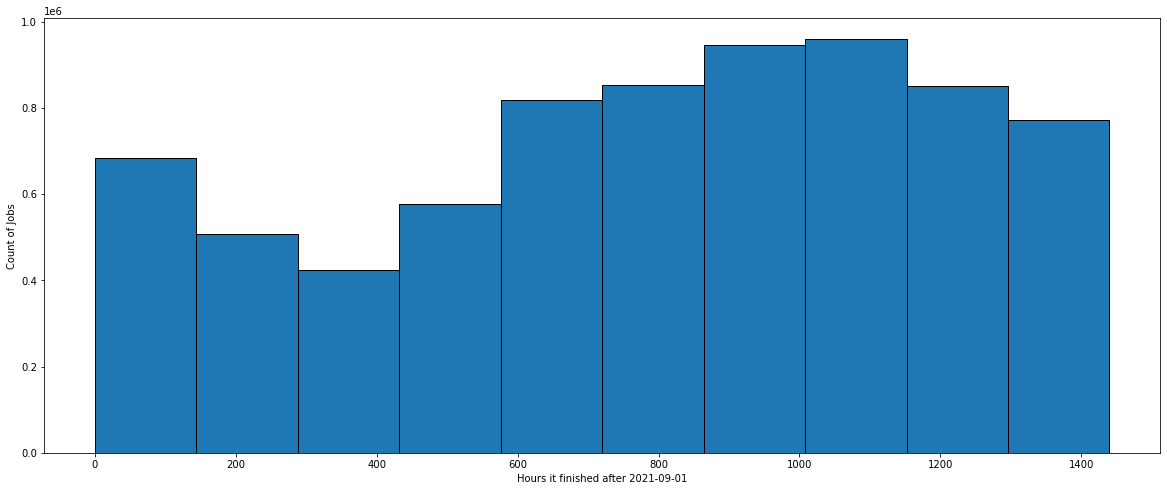

In [20]:
dates_input = graph_df["subtract_check"]
bins = [24, 48, 72, 96, 120, 144, 168, 192, 336, 504, 1008]
plt.hist(dates_input, density=False, edgecolor='black', bins=10)
plt.ylabel('Count of Jobs')
plt.xlabel('Hours it finished after 2021-09-01');

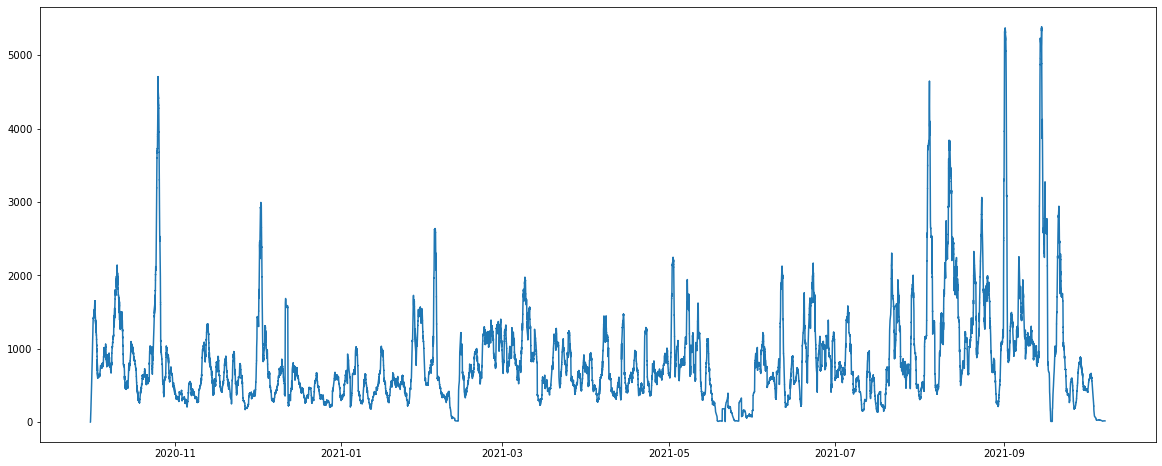

In [25]:
#plt.plot((graph_df["END"]),graph_df["rolling_24_hour_average"])
plt.plot((graph_df["END"]),graph_df["rolling_1_hour_average"])

plt.show()